<a href="https://colab.research.google.com/github/NDK2212/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import os
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split

data_link = '/content/drive/MyDrive/AIO2024-017/MODULE 3/cleveland.csv'
df = pd.read_csv(data_link, header = None)
df.columns = ['age' , 'sex' , 'cp ', 'trestbps' , 'chol' ,'fbs' , 'restecg' , 'thalach' , 'exang' ,'oldpeak' , 'slope' , 'ca' , 'thal' , 'target']
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())
df['target'] = df.target.map({0:0, 1:1, 2:1, 3:1, 4:1})
print(df)

     age  sex  cp   trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1    1       145   233    1        2      150      0      2.3   
1     67    1    4       160   286    0        2      108      1      1.5   
2     67    1    4       120   229    0        2      129      1      2.6   
3     37    1    3       130   250    0        0      187      0      3.5   
4     41    0    2       130   204    0        2      172      0      1.4   
..   ...  ...  ...       ...   ...  ...      ...      ...    ...      ...   
298   45    1    1       110   264    0        0      132      0      1.2   
299   68    1    4       144   193    1        0      141      0      3.4   
300   57    1    4       130   131    0        0      115      1      1.2   
301   57    0    2       130   236    0        2      174      0      0.0   
302   38    1    3       138   175    0        0      173      0      0.0   

     slope        ca  thal  target  
0        3  0.000000   6.0       0  
1

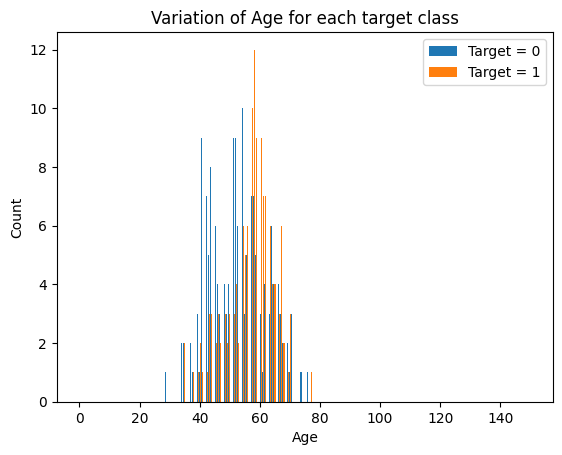

In [4]:
# Bai tap 1
x_data = df['age']
bin_range = (0,150)
num_bins = 200
bins = np.linspace(bin_range[0], bin_range[1], num_bins + 1)
bin_centers = (bins[:-1] + bins[1:]) / 2
counts_target0 = np.zeros(len(bins) - 1)  # For target = 0
counts_target1 = np.zeros(len(bins) - 1)  # For target = 1

target = df['target']
for i in range(len(x_data)):
    bin_index = np.digitize(x_data[i], bins) - 1
    if bin_index >= 0 and bin_index < len(bins) - 1:
        if target[i] == 0:
            counts_target0[bin_index] += 1
        elif target[i] == 1:
            counts_target1[bin_index] += 1
fig,ax = plt.subplots()
bar_width = 0.35
# Plot bars for target = 0
ax.bar(bin_centers - bar_width/2, counts_target0, width=bar_width, label='Target = 0')
# Plot bars for target = 1
ax.bar(bin_centers + bar_width/2, counts_target1, width=bar_width, label='Target = 1')
ax.set_xlabel('Age')
ax.set_ylabel('Count')
ax.set_title('Variation of Age for each target class')
ax.legend()
plt.show()

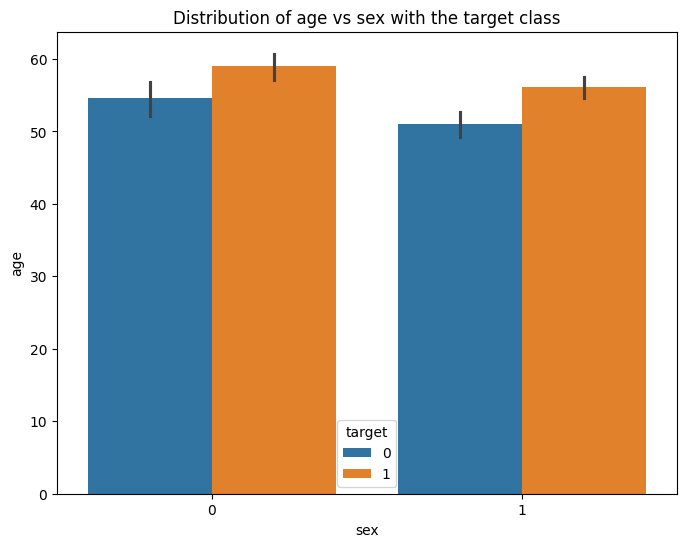

In [5]:
#bai tap 2
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and contains 'sex', 'age', and 'target' columns
df_2 = df[['sex','age','target']]
plt.figure(figsize=(8, 6))

# Create a grouped bar plot
sns.barplot(x='sex', y='age', hue='target', data=df_2)

# Add labels and title
plt.xlabel('sex')
plt.ylabel('age')
plt.title('Distribution of age vs sex with the target class')

# Show the plot
plt.show()


In [13]:
# bai tạp 3
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
knn_class = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30,p=2,metric='minkowski')
knn_class.fit(X_train,y_train)
knn_preds = knn_class.predict(X_test)
cm_train = confusion_matrix(y_train, knn_class.predict(X_train))
cm_test = confusion_matrix(y_test, knn_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for KNeighborsClassifier = {accuracy_for_train}')
print(f'Accuracy for test set for KNeighborsClassifier = {accuracy_for_test}')

Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [14]:
# bai tạp 4
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
SVM_class = svm.SVC(kernel='rbf', random_state=42)
SVM_class.fit(X_train,y_train)
SVM_preds = SVM_class.predict(X_test)
cm_train = confusion_matrix(y_train, SVM_class.predict(X_train))
cm_test = confusion_matrix(y_test, SVM_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for SVM = {accuracy_for_train}')
print(f'Accuracy for test set for SVM = {accuracy_for_test}')

Accuracy for training set for SVM = 0.66
Accuracy for test set for SVM = 0.67


In [16]:
# bai tạp 5
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
NB_class = GaussianNB()
NB_class.fit(X_train,y_train)
NB_preds = NB_class.predict(X_test)
cm_train = confusion_matrix(y_train, NB_class.predict(X_train))
cm_test = confusion_matrix(y_test, NB_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Naive Bayes = {accuracy_for_train}')
print(f'Accuracy for test set for Naive Bayes = {accuracy_for_test}')

Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


In [21]:
#bai tap 6
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
dtree_class = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,random_state=42)
dtree_class.fit(X_train,y_train)
dtree_preds = dtree_class.predict(X_test)
cm_train = confusion_matrix(y_train, dtree_class.predict(X_train))
cm_test = confusion_matrix(y_test, dtree_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Decision Tree = {accuracy_for_train}')
print(f'Accuracy for test set for Decision Tree = {accuracy_for_test}')

Accuracy for training set for Decision Tree = 1.0
Accuracy for test set for Decision Tree = 0.75


In [23]:
#bai tap 7
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
randfor_class = RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=2,n_estimators=10,random_state=42)
randfor_class.fit(X_train,y_train)
randfor_preds = randfor_class.predict(X_test)
cm_train = confusion_matrix(y_train, randfor_class.predict(X_train))
cm_test = confusion_matrix(y_test, randfor_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Random Forest = {accuracy_for_train}')
print(f'Accuracy for test set for Random Forest = {accuracy_for_test}')

Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


In [32]:
#bai tap 8
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
adaboost_class = AdaBoostClassifier(n_estimators=50,learning_rate=1.0,random_state=42)
adaboost_class.fit(X_train,y_train)
adaboost_preds = adaboost_class.predict(X_test)
cm_train = confusion_matrix(y_train, adaboost_class.predict(X_train))
cm_test = confusion_matrix(y_test, adaboost_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Adaboost = {accuracy_for_train}')
print(f'Accuracy for test set for Adaboost = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for training set for Adaboost = 0.91
Accuracy for test set for Adaboost = 0.84


In [30]:
#bai tap 9
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
gradientboost_class = GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,min_samples_split=2,max_depth=3,random_state=42)
gradientboost_class.fit(X_train,y_train)
gradientboost_preds = gradientboost_class.predict(X_test)
cm_train = confusion_matrix(y_train, gradientboost_class.predict(X_train))
cm_test = confusion_matrix(y_test, gradientboost_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Gradientboost = {accuracy_for_train}')
print(f'Accuracy for test set for Gradientboost = {accuracy_for_test}')

Accuracy for training set for Gradientboost = 1.0
Accuracy for test set for Gradientboost = 0.85


In [35]:
#bai tap 10
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
xgboost_class = xgb.XGBClassifier(objective="binary:logistic",n_estimators=100,random_state=42)
xgboost_class.fit(X_train,y_train)
xgboost_preds = xgboost_class.predict(X_test)
cm_train = confusion_matrix(y_train, xgboost_class.predict(X_train))
cm_test = confusion_matrix(y_test, xgboost_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for XGBoost = {accuracy_for_train}')
print(f'Accuracy for test set for XGBoost = {accuracy_for_test}')

Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


In [42]:
#bai tap 11
from sklearn.ensemble import StackingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2,
                                                    random_state=42)
estimators = [
    ('dtc', DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2,random_state=42)),
    ('rfc', RandomForestClassifier(criterion='gini',max_depth=10,min_samples_split=2,n_estimators=10,random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto',leaf_size=30,p=2,metric='minkowski')),
    ('xgb', XGBClassifier(objective="binary:logistic",n_estimators=100,random_state=42)), # Assuming default XGBoost parameters
    ('gc', GradientBoostingClassifier(learning_rate=0.1,n_estimators=100,subsample=1.0,min_samples_split=2,max_depth=3,random_state=42)),
    ('svc', SVC(kernel='rbf', random_state=42)),
    ('ad', AdaBoostClassifier(n_estimators=50,learning_rate=1.0,random_state=42))
]
stack_class = StackingClassifier(estimators=estimators)
stack_class.fit(X_train,y_train)
stack_preds = stack_class.predict(X_test)
cm_train = confusion_matrix(y_train, stack_class.predict(X_train))
cm_test = confusion_matrix(y_test, stack_preds)
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print(f'Accuracy for training set for Stacking = {accuracy_for_train}')
print(f'Accuracy for test set for Stacking = {accuracy_for_test}')

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1

Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.85
